The goal is to see how we can read the data contained in a netCDF file. Several possibilities will be examined.

# Reading a local file

Let's assume we have downlowded a file from [CMEMS](http://marine.copernicus.eu/). We define the directory and the file name. *datafile* have to be adapted according to your case. 

In [5]:
datafile = "~/CMEMS_INSTAC/INSITU_MED_NRT_OBSERVATIONS_013_035/history/mooring/IR_TS_MO_61198.nc"

In [6]:
import os
datafile = os.path.expanduser(datafile)

To read the file we need the [netCDF4 interface](http://unidata.github.io/netcdf4-python/) for python. 

In [7]:
import netCDF4
ds = netCDF4.Dataset(datafile, 'r')

where the first argurment of the files and **'r'** indicates that it's open for reading (**'w'** would be used for writing).<br/> 
**ds** contains all the information about the dataset:
* Metadata (global attributes)
* Dimensions
* Variables

## Metadata

In [8]:
ds

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format UNDEFINED):
    data_type: OceanSITES time-series data
    format_version: 1.2
    platform_code: 61198
    date_update: 2015-08-02T11:20:44Z
    institution: Puertos del Estado (Spain)
    institution_edmo_code: 2751
    site_code:  
    wmo_platform_code: 61198
    source: Mooring observation
    history: 2015-08-02T11:20:44Z: Creation
    data_mode: R
    quality_control_indicator: 6
    quality_index: A
    references: http://www.oceansites.org, http://www.myocean.eu.org/, http://www.puertos.es, http://www.puertos.es
    comment:  
    conventions: OceanSITES Manual 1.2, InSituTac-Specification-Document
    netcdf_version: 3.5
    title:  
    summary:  
    naming_authority: OceanSITES
    id: IR_TS_MO_61198
    cdm_data_type: Time-series
    area: North Atlantic Ocean
    geospatial_lat_min: 25.0
    geospatial_lat_max: 37.43
    geospatial_lon_min: -20.0
    geospatial_lon_max: -0.75
    geospa

We can access the global attributes individually:

In [9]:
print 'Institution: ' + ds.institution
print 'Reference: ' + ds.institution_references

Institution: Puertos del Estado (Spain)
Reference: http://www.puertos.es


## Data

Now we want to load some of the variables: we use the *ds.variables*

In [10]:
time = ds.variables['TIME']
temperature = ds.variables['TEMP']

Let's examine the variable temperature

In [11]:
temperature

<type 'netCDF4._netCDF4.Variable'>
float32 TEMP(TIME, DEPTH)
    long_name: Sea temperature
    standard_name: sea_water_temperature
    units: degree_Celsius
    _FillValue: 99999.0
    QC_procedure: 1
    valid_min: 0.0
    valid_max: 31.0
    comment:  
    sensor_depth: 3.0
    ancillary_variables: TEMP_QC
    sensor_mount:  
    sensor_orientation:  
    DM_indicator: D
unlimited dimensions: TIME
current shape = (119916, 1)
filling off

This means that the variable depends on two dimensions: time and depth. We also know the long_name, standard_name, units, and other useful pieces of information concerning the temperature.

To get the values corresponding to the variables, the synthax is:

In [12]:
temperature_values = temperature[:]
time_values = time[:]

To get the variable attributes:

In [13]:
print 'Time units: ' + time.units
print 'Temperature units: ' + temperature.units

Time units: days since 1950-01-01T00:00:00Z
Temperature units: degree_Celsius


## Quality flags

Just a quick plot to see everything is fine. More details about the plots will be given later.

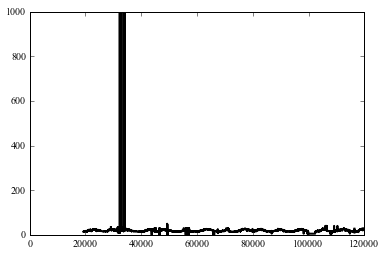

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(temperature)
plt.show()

It seems that we have not taken into accound the quality flags of the data. We can load the corresponding variable *TEMP_QC*.

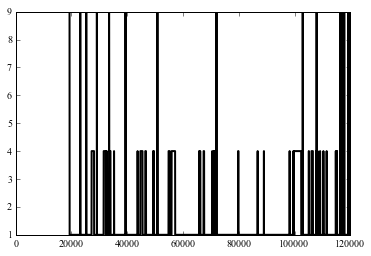

In [17]:
temperatureQC = ds.variables['TEMP_QC']
plt.plot(temperatureQC[:])
plt.show()

The meaning of the quality flags is also stored in the file.

In [18]:
print 'Flag values: ' + str(temperatureQC.flag_values)
print 'Flag meanings: ' + temperatureQC.flag_meanings

Flag values: [0 1 2 3 4 5 6 7 8 9]
Flag meanings: no_qc_performed good_data probably_good_data bad_data_that_are_potentially_correctable bad_data value_changed not_used nominal_value interpolated_value missing_value


Now we will generate a new plot of the time series using only data with **QF = 1**.

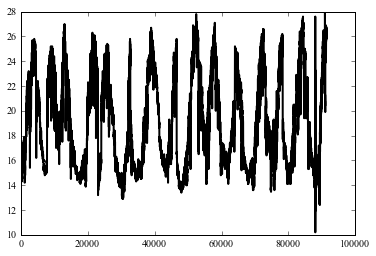

In [19]:
plt.plot(temperature[(temperatureQC[:, 0] == 1), 0])
plt.show()

The resulting plot now seems correct, with values ranging roughly between 10 and 28ºC.

Last thing to remember: close the netCDF file!

In [43]:
nc.close()